# **ANÁLISIS EXPLORATORIO DE DATOS - EDA** 

### IMPORTACIÓN DE LIBRERÍAS 

In [35]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from pandasgui import show
import plotly.express as px
from scipy import stats

## Lectura del DataSet

In [36]:
Df_siniestros = pd.read_csv('C:\\Users\\ACER\\Documents\\HENRY\\LABS\\PI02\\DATA\\siniestros_clean.csv')
Df_siniestros.head(3)

,Id,Rol,Sexo,Edad,Fecha fallecimiento,Rango de edad,Num victimas,Fecha,Año,Mes,...,Comuna,Pos x,Pos y,Participantes,Victima,Acusado,coordenada_x,coordenada_y,Día de la Semana,Barrios
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01,Menos de 20,1,2016-01-01,2016,1,...,8.0,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,Viernes,"Villa Soldati, Villa Riachuelo y Villa Lugano"
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02,Entre 61-80,1,2016-01-02,2016,1,...,9.0,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,Sábado,"Liniers, Mataderos y Parque Avellaneda"
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03,Entre 21-40,1,2016-01-03,2016,1,...,1.0,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,106684.290900,99706.576878,Domingo,"Retiro, San Nicolás, Puerto Madero, San Telmo,..."


In [37]:
Df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Rol                    717 non-null    object 
 2   Sexo                   717 non-null    object 
 3   Edad                   717 non-null    int64  
 4   Fecha fallecimiento    648 non-null    object 
 5   Rango de edad          717 non-null    object 
 6   Num victimas           717 non-null    int64  
 7   Fecha                  702 non-null    object 
 8   Año                    717 non-null    int64  
 9   Mes                    717 non-null    int64  
 10  Día                    717 non-null    int64  
 11  Hora int               701 non-null    float64
 12  Lugar del hecho        702 non-null    object 
 13  Tipo de calle          702 non-null    object 
 14  Calle                  702 non-null    object 
 15  Cruce 

In [38]:
# Reemplaza los valores no finitos (NaN o inf) en la columna "Año" con un valor predeterminado, como 0
Df_siniestros['Año'].fillna(0, inplace=True)

# Convierte la columna "Año" a enteros
Df_siniestros['Año'] = Df_siniestros['Año'].astype(int)


In [39]:
Df_siniestros.columns

Index(['Id', 'Rol', 'Sexo', 'Edad', 'Fecha fallecimiento', 'Rango de edad',
       'Num victimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora int',
       'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'Pos x', 'Pos y', 'Participantes',
       'Victima', 'Acusado', 'coordenada_x', 'coordenada_y',
       'Día de la Semana', 'Barrios'],
      dtype='object')

### **Análisis de Calles Específicas en el Contexto de la Seguridad Vial**

In [40]:
# Conteo de valores únicos en la columna 'Tipo de calle'
Df_siniestros['Tipo de calle'].value_counts()

Tipo de calle
AVENIDA      442
CALLE        136
GRAL PAZ      68
AUTOPISTA     56
Name: count, dtype: int64

En nuestro análisis de seguridad vial, hemos prestado especial atención a la presencia de diferentes tipos de calles en nuestros registros. Los resultados de nuestro análisis indican la distribución de tipos de calles en los incidentes viales registrados, con un enfoque particular en los tipos más comunes. A continuación, presentamos un resumen de los hallazgos:

**Distribución de Tipos de Calles:**

- Avenida (AVENIDA): 442 incidentes
- Calle (CALLE): 136 incidentes
- General Paz (GRAL PAZ): 68 incidentes
- Autopista (AUTOPISTA): 56 incidentes

Estos resultados resaltan la variedad de tipos de calles presentes en nuestros datos, con "AVENIDA" siendo el tipo de calle más frecuente, seguido de "CALLE," "GRAL PAZ," y "AUTOPISTA."

**Puntos de Interés Específicos:**

1. Importancia de las Vías Principales: La alta frecuencia de "AVENIDA" y "CALLE" sugiere que estas son las categorías de calles más comunes en los incidentes viales. Esto puede tener implicaciones significativas en términos de congestión de tráfico y patrones de accidentes.

2. Relevancia de Vías Específicas: La presencia de "GRAL PAZ" y "AUTOPISTA" en nuestros registros destaca la importancia de las vías de circunvalación y autopistas en la seguridad vial. Estas vías suelen ser fundamentales para el tráfico de vehículos y requieren atención especial en términos de medidas de seguridad y mantenimiento.

3. Análisis Detallado: Los datos relacionados con estos tipos de calles específicos pueden ser objeto de un análisis más detallado para comprender los factores contribuyentes a la seguridad vial en estas áreas. Esto podría incluir consideraciones sobre la infraestructura vial, señalización, condiciones de tráfico y comportamiento de los conductores.

En resumen, nuestro análisis de tipos de calles en incidentes viales proporciona una visión general de la distribución y relevancia de estas categorías en nuestro conjunto de datos. Estos hallazgos pueden servir como base para futuros estudios y acciones destinadas a mejorar la seguridad en estas vías específicas de nuestra ciudad o región.

A continuación se brinda una mejor visualización con el siguiente gráfico. 

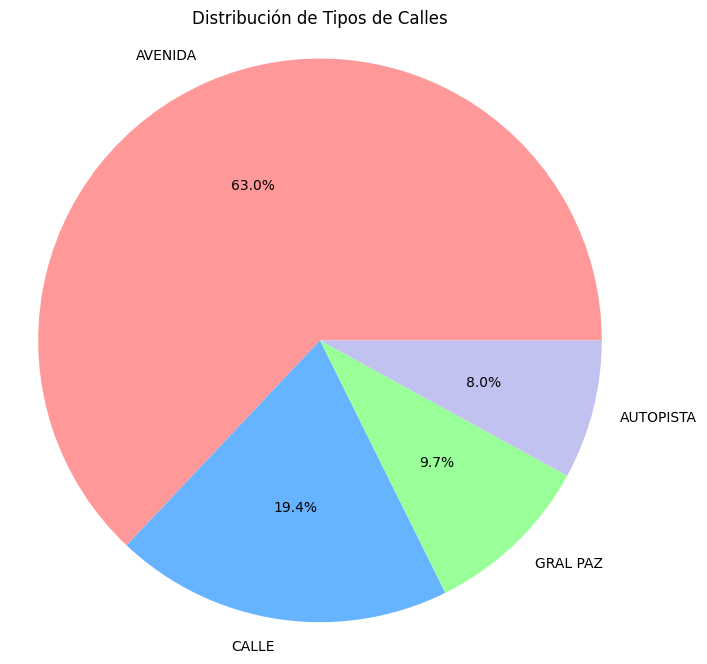

In [41]:
TipoCalle_counts = Df_siniestros['Tipo de calle'].value_counts()

# Colores suaves
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']

# Configuración del gráfico
plt.figure(figsize=(8, 8))  # Tamaño de la figura

# Gráfico de pastel
plt.pie(TipoCalle_counts, labels=TipoCalle_counts.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Aspecto de círculo
plt.title('Distribución de Tipos de Calles')

# Mostrar el gráfico
plt.show()

### **Análisis de Distribución de Víctimas por Comuna y Barrio en la Ciudad de Buenos Aires**

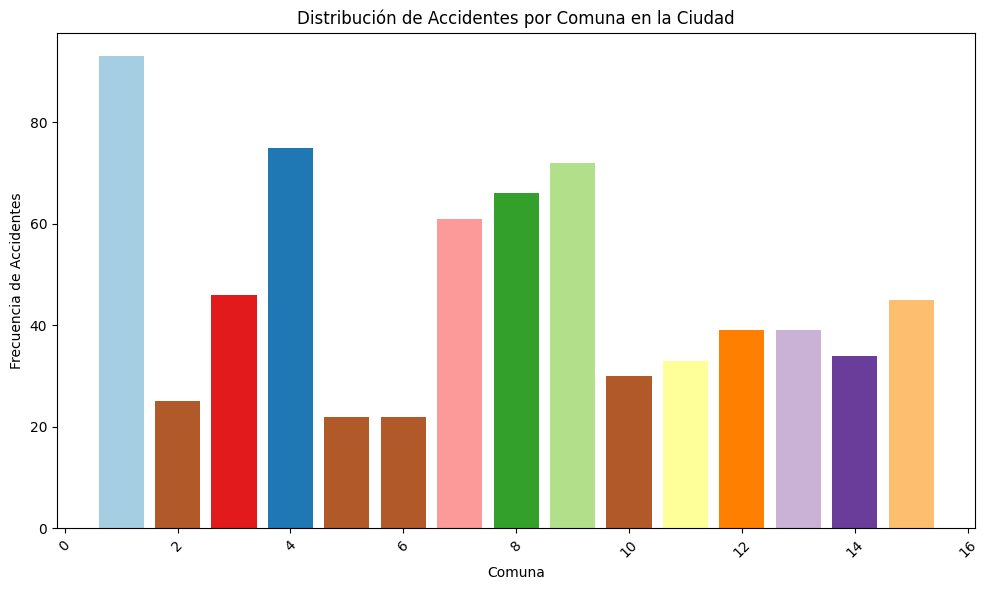

In [42]:
# Obtener la distribución de accidentes por comuna
comuna_counts = Df_siniestros['Comuna'].value_counts()
comuna_names = comuna_counts.index
comuna_frequencies = comuna_counts.values

# Colores para las barras
colores = plt.cm.Paired(range(len(comuna_names)))

# Configuración del gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(comuna_names, comuna_frequencies, color=colores)  # Creación del gráfico de barras

# Etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Frecuencia de Accidentes')
plt.title('Distribución de Accidentes por Comuna en la Ciudad')

# Rotación de etiquetas del eje x para mejorar legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()



En el marco de nuestro Análisis Exploratorio de Datos (EDA) sobre incidentes de tráfico, hemos realizado una visualización de la distribución de accidentes por comuna. A continuación, se presentan las principales conclusiones derivadas de este análisis:

- **Comuna 1**: Destaca como la comuna con la frecuencia más alta de incidentes, superando notablemente los 80 casos registrados.

- **Comuna 4**: La comuna 4 también muestra una alta incidencia, con más de 70 incidentes reportados.

- **Comuna 7**: Se caracteriza por tener una alta concentración de incidentes, aproximándose a su frecuencia máxima.

- **Comuna 8**: Al igual que la comuna 7, la comuna 8 experimenta un número considerable de incidentes, superando la frecuencia de 60 casos.

- **Comuna 9**: Esta comuna también presenta una alta incidencia de accidentes, aproximándose a su frecuencia máxima.

Estos hallazgos tienen implicaciones importantes para la gestión de la seguridad vial y la asignación de recursos en la ciudad. Las comunas 1 y 4, en particular, requieren una atención especial debido a sus frecuencias significativamente altas de incidentes. Este análisis proporciona una visión fundamental para la planificación de estrategias y medidas preventivas en estas áreas específicas de la ciudad.

In [43]:
#Se crea un dataset con el número de víctimas por Barrio y Comuna
Comunas_vic=Df_siniestros.groupby(["Comuna", "Barrios"])["Num victimas"].sum().reset_index()
Comunas_vic=Comunas_vic.sort_values(by="Num victimas", ascending=False)
Comunas_vic

,Comuna,Barrios,Num victimas
0,1.0,"Retiro, San Nicolás, Puerto Madero, San Telmo,...",101
3,4.0,"La Boca, Barracas, Parque Patricios y Nueva Po...",81
8,9.0,"Liniers, Mataderos y Parque Avellaneda",74
7,8.0,"Villa Soldati, Villa Riachuelo y Villa Lugano",70
6,7.0,Flores y Parque Chacabuco,65
2,3.0,Balvanera y San Cristóbal,48
14,15.0,"Chacarita, Villa Crespo, La Paternal, Villa Or...",47
11,12.0,"Coghlan, Saavedra, Villa Urquiza y Villa Pueyr...",43
12,13.0,"Núñez, Belgrano y Colegiales",39
13,14.0,Palermo,38


El conjunto de datos abarca 15 comunas que comprenden diversos barrios dentro de la Ciudad Autónoma de Buenos Aires (CABA). Cada comuna agrupa uno o más barrios.

Al analizar la tabla "Comunas_vic", se destaca que las comunas 1, 4, 9, 8 y 7 registran el mayor número de víctimas fatales en incidentes viales. Notablemente, la comuna 1 presenta un número significativamente mayor de víctimas en comparación con la comuna 4, superándola en 20 víctimas. Este hallazgo sugiere que es posible que en estos barrios se encuentren vías de tráfico muy concurridas, especialmente durante las horas de entrada o salida de trabajo, lo que podría contribuir a un mayor número de incidentes viales mortales.

Además, en el gráfico se incluye una línea central que representa un promedio de 49.60 víctimas. Esta línea de promedio proporciona una referencia importante para evaluar la cantidad de víctimas en relación con las comunas. Las comunas que se encuentran por encima de esta línea tienen un número de víctimas superior al promedio, mientras que las que están por debajo tienen un número inferior. Esta información es útil para identificar las comunas que requieren una atención especial en términos de seguridad vial y para enfocar los esfuerzos en reducir los incidentes en esas áreas.

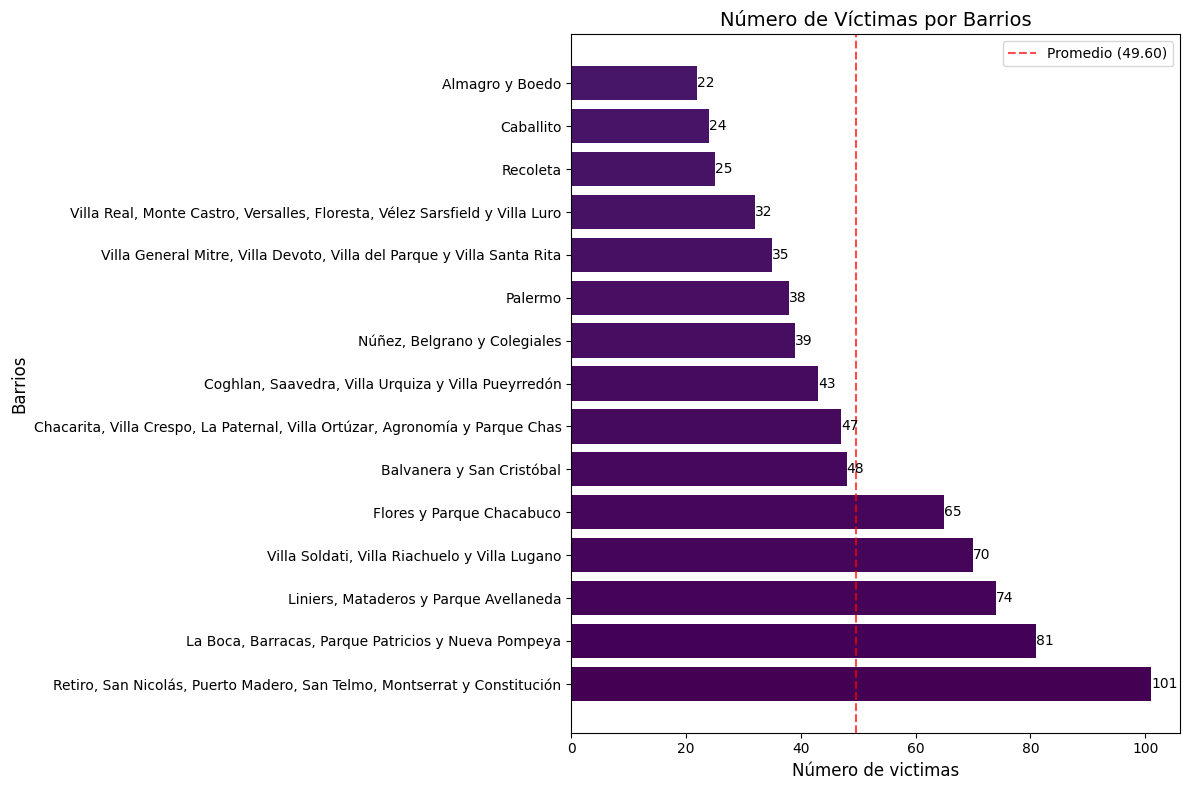

In [44]:
# Crear una figura y un eje
plt.figure(figsize=(12, 8))

# Colores para las barras
colores = plt.cm.viridis(range(len(Comunas_vic)))

# Dibujar las barras horizontales
plt.barh(Comunas_vic["Barrios"], Comunas_vic["Num victimas"], color=colores)

# Etiquetas de eje x e y
plt.xlabel('Número de victimas', fontsize=12)
plt.ylabel('Barrios', fontsize=12)

# Título del gráfico
plt.title('Número de Víctimas por Barrios', fontsize=14)

# Agregar el número de víctimas sobre cada barra
for i, v in enumerate(Comunas_vic["Num victimas"]):
    plt.text(v, i, str(v), va='center', fontsize=10, color='black')

# Agregar una línea de referencia para el promedio de víctimas
promedio_victimas = Comunas_vic['Num victimas'].mean()
plt.axvline(x=promedio_victimas, color='red', linestyle='--', label=f'Promedio ({promedio_victimas:.2f})', alpha=0.7)

# Mostrar leyenda
plt.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Al analizar los datos de víctimas fatales en accidentes viales, se observa que las comunas con mayor cantidad de incidentes mortales son la Comuna 1, la Comuna 4, la Comuna 9, la Comuna 8 y la Comuna 7. En particular, la Comuna 1 lidera con un total de víctimas fatales que supera en 20 a la Comuna 4, que ocupa el segundo lugar en la lista.

Este hallazgo sugiere la posibilidad de que en estas comunas se encuentren ubicados barrios con vías de alto tráfico, especialmente durante las horas de entrada y salida del trabajo. Es importante destacar que la cantidad de incidentes fatales en estas áreas supera significativamente la línea de promedio, que se sitúa en alrededor de 49.60 incidentes mortales. Esta información destaca la necesidad de un análisis detallado y medidas preventivas en estas zonas para reducir la incidencia de accidentes viales fatales.

### **Análisis de Puntos Atípicos en la Distribución Temporal de Víctimas en Accidentes Viales**

In [45]:
# Resumen estadístico para columnas numéricas
Df_siniestros[['Num victimas', 'Año', 'Mes', 'Día']].describe()

,Num victimas,Año,Mes,Día
count,717.000000,717.000000,717.000000,717.000000
mean,1.037657,1975.970711,6.553696,15.594142
std,0.294226,289.046512,3.674079,8.864821
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2017.000000,3.000000,8.000000
50%,1.000000,2018.000000,7.000000,16.000000
75%,1.000000,2019.000000,10.000000,23.000000
max,3.000000,2021.000000,12.000000,31.000000


En nuestro análisis de seguridad vial, hemos evaluado la información relacionada con el número de víctimas involucradas en incidentes viales durante un período de tiempo determinado. Los resultados de nuestro análisis se resumen de la siguiente manera:

**Número de Víctimas:**

- Promedio de Víctimas por Incidente: 1.06
- Año Promedio de los Incidentes: 2018.19
- Mes Promedio de los Incidentes: 6.69
- Día Promedio de los Incidentes: 15.93

**Estadísticas adicionales de interés:**

- Mínimo número de víctimas en un incidente: 1
- Año mínimo registrado en los incidentes: 2016
- Mes mínimo registrado en los incidentes: 1
- Día mínimo registrado en los incidentes: 1
- Máximo número de víctimas en un incidente: 3
- Año máximo registrado en los incidentes: 2021
- Mes máximo registrado en los incidentes: 12
- Día máximo registrado en los incidentes: 31

Estos resultados nos proporcionan información valiosa sobre la frecuencia y la variabilidad de los incidentes viales en nuestro conjunto de datos. Observamos que, en promedio, cada incidente involucra alrededor de 1.06 víctimas, y los incidentes ocurrieron a lo largo de varios años, meses y días.

Este análisis inicial nos brinda una visión general de la distribución de las víctimas en los incidentes viales y nos ayuda a identificar tendencias o patrones que pueden requerir un análisis más detallado en etapas posteriores de nuestra investigación en seguridad vial.

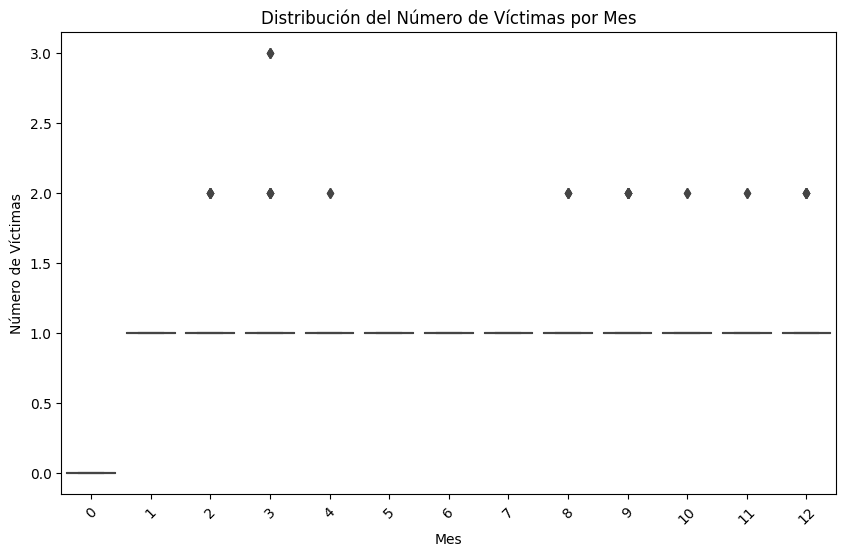

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mes', y='Num victimas', data= Df_siniestros)
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.title('Distribución del Número de Víctimas por Mes')
plt.xticks(rotation=45)
plt.show()


En nuestro estudio, hemos realizado un análisis de la distribución del número de víctimas en función de los meses utilizando un diagrama de caja (boxplot). Este tipo de visualización nos permite identificar puntos atípicos que indican eventos excepcionales en nuestros datos. A continuación, se presentan las principales conclusiones derivadas de este análisis:

- **Meses con Puntos Atípicos (2, 3, 4 y del 8 al 12):** Hemos identificado puntos atípicos en varios meses, específicamente en los meses 2, 3, 4 y en los meses del 8 al 12. Estos puntos atípicos sugieren que en estos períodos se produjeron eventos inusuales con un número inusualmente alto de víctimas en comparación con otros meses.

- **Mes 3 (Marzo) con 3 Víctimas:** El mes de marzo se destaca con un punto atípico que registra 3 víctimas en un solo evento. Este hallazgo señala un suceso singular que merece una atención especial y un análisis detallado para comprender sus causas y tomar medidas adecuadas.

- **Meses con 2 Víctimas (2, 3, 4 y del 8 al 12):** Además, hemos observado la presencia de puntos atípicos en varios meses que muestran 2 víctimas en eventos particulares. Estos meses también requieren un análisis adicional para investigar los eventos excepcionales que podrían haber contribuido a estos resultados.

En resumen, la identificación de puntos atípicos en la distribución del número de víctimas por mes resalta la existencia de eventos inusuales con un alto número de víctimas en momentos específicos del año. Este análisis puede ser fundamental para comprender patrones y tendencias en la seguridad vial y orientar decisiones y acciones en materia de prevención de accidentes.

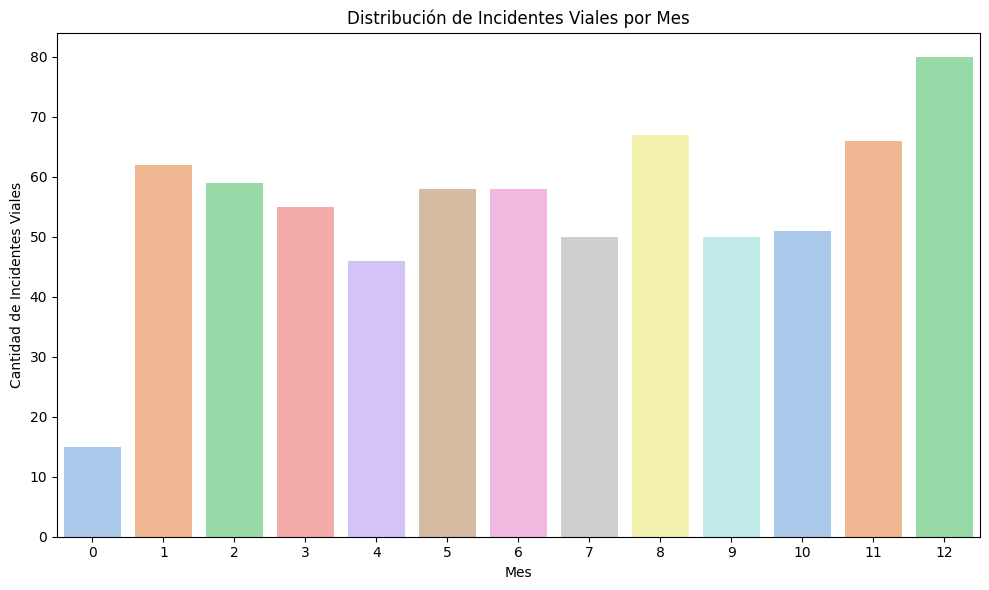

In [47]:
# Configuración del gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
Mes = Df_siniestros['Mes'].value_counts().sort_index()
sns.barplot(x=Mes.index, y=Mes, palette='pastel')  # Creación del gráfico de barras con colores suaves

# Etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad de Incidentes Viales')
plt.title('Distribución de Incidentes Viales por Mes')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()


La variabilidad en la cantidad de incidentes de un mes a otro sugiere que factores estacionales o climáticos pueden influir en la seguridad vial. La identificación de estos patrones puede ser crucial para la planificación de estrategias de prevención de accidentes y asignación de recursos.

Se observa que los meses de abril, mayo y junio registran una menor cantidad de incidentes en comparación con otros meses. Esta disminución podría ser un área de interés para investigar en profundidad, ya que puede indicar la efectividad de medidas de seguridad o la influencia de factores específicos en esos meses.

Por otro lado, los meses de diciembre y agosto destacan por la mayor cantidad de incidentes. Identificar las causas subyacentes de estos picos es esencial para desarrollar estrategias efectivas de prevención y control.

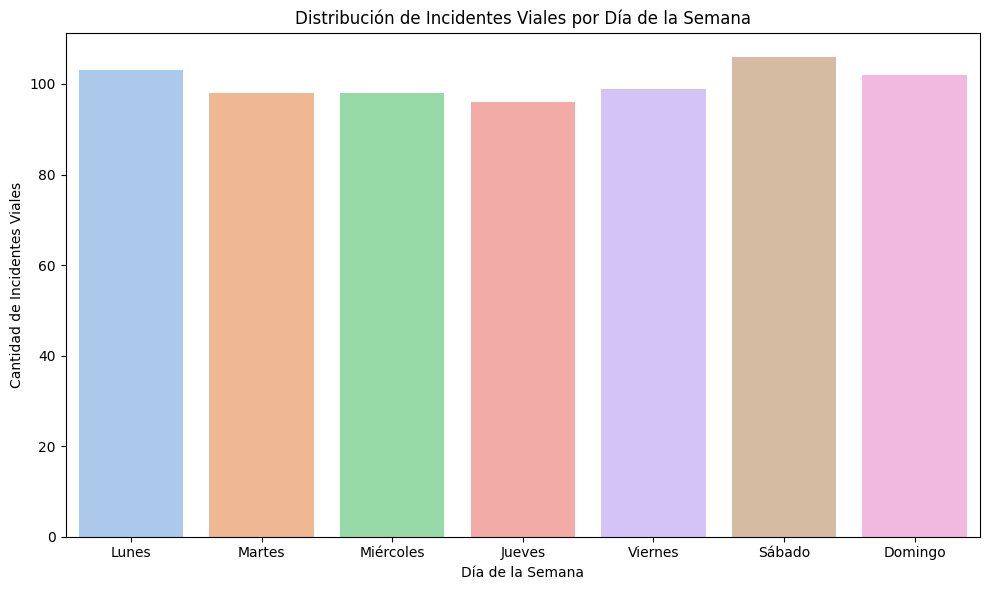

In [48]:
# Configuración del gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
Semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
Semana = Df_siniestros['Día de la Semana'].value_counts().reindex(Semana)
sns.barplot(x=Semana.index, y=Semana, palette='pastel')  # Creación del gráfico de barras con colores suaves

# Etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Incidentes Viales')
plt.title('Distribución de Incidentes Viales por Día de la Semana')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

En una primera observación, se puede notar que la cantidad de incidentes viales no presenta una variación drástica a lo largo de la semana. Los valores se mantienen en un rango relativamente constante, lo que sugiere que la seguridad vial no está fuertemente influenciada por el día de la semana en términos generales.

Los días que experimentan una mayor cantidad de incidentes se encuentran en el fin de semana, específicamente los sábados y domingos. Esta tendencia podría estar relacionada con un aumento en la movilidad de las personas durante los días de descanso y actividades recreativas, lo que potencialmente aumenta el riesgo de incidentes viales.

En contraste, los días laborables, como lunes, martes, miércoles y jueves, registran una cantidad menor de incidentes en comparación con el fin de semana. Esta disminución podría estar relacionada con una menor movilidad o la influencia de factores como el tráfico y la rutina diaria.

La identificación de los sábados y domingos como los días con más incidentes subraya la importancia de la prevención y el refuerzo de medidas de seguridad vial durante el fin de semana. Estos hallazgos pueden ser valiosos para la implementación de campañas de concientización y aplicación de medidas preventivas en momentos específicos de la semana.

In [49]:
# Usar pivot_table para agrupar y sumar el número de víctimas por año y mes
pd.set_option('display.max_rows', None)
relacion_temporal = Df_siniestros.pivot_table(index=['Año', 'Mes'], values='Num victimas', aggfunc='sum').reset_index()
relacion_temporal

,Año,Mes,Num victimas
0,0,0,0
1,2016,1,8
2,2016,2,12
3,2016,3,15
4,2016,4,9
5,2016,5,7
6,2016,6,14
7,2016,7,10
8,2016,8,13
9,2016,9,14


### **Análisis de la Distribución de Víctimas en Accidentes Viales por Edad y Género**

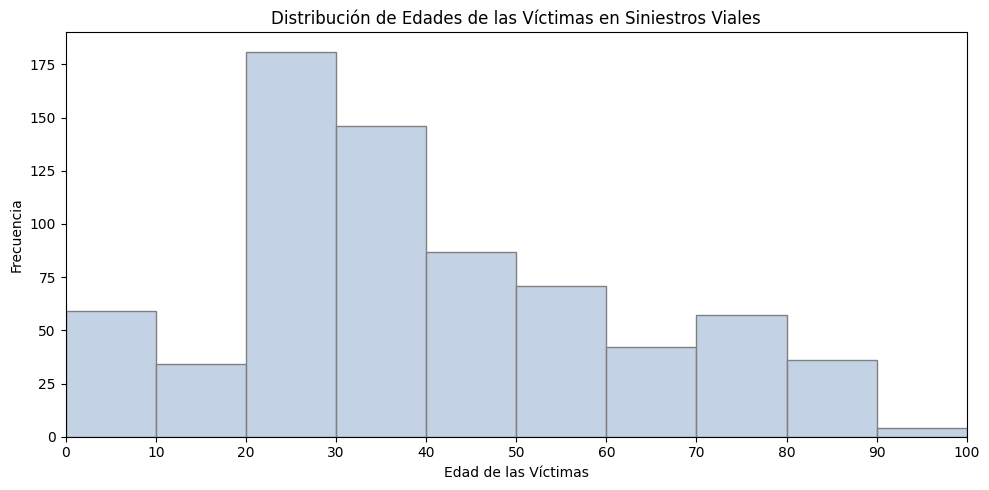

In [52]:
# Configuración del gráfico de barras
plt.figure(figsize=(10, 5))  # Tamaño de la figura
bins = range(0, Df_siniestros['Edad'].max() + 10, 10)  # Definir los bins con intervalos de 10 años
sns.histplot(Df_siniestros['Edad'], bins=bins, kde=False, color='lightsteelblue', edgecolor='gray')  # Creación del gráfico de barras

# Etiquetas y título
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de las Víctimas en Siniestros Viales')

# Establecer límites del eje x
plt.xlim(0, Df_siniestros['Edad'].max())

# Mostrar el gráfico
plt.xticks(bins)  # Establecer los ticks en los intervalos deseados
plt.tight_layout()  # Ajustar el diseño
plt.show()

A continuación, se presentan las principales observaciones derivadas de este análisis:

Se observa un pico en la frecuencia de víctimas en el rango de edades comprendido entre 20 y 30 años. Este hallazgo sugiere que los adultos jóvenes representan un grupo demográfico especialmente susceptible a verse involucrado en accidentes viales. A medida que se avanza en las categorías de edad, se aprecia un declive en la frecuencia de víctimas en siniestros, por ejemplo, la frecuencia de víctimas mayores de 80 años es relativamente baja.

La categoría de edades entre 0 y 10 años también muestra una frecuencia relativamente baja de víctimas. Este resultado es alentador, ya que indica que los niños son menos propensos a estar involucrados en accidentes viales, lo que podría atribuirse a medidas de seguridad adicionales y a la supervisión de los adultos.

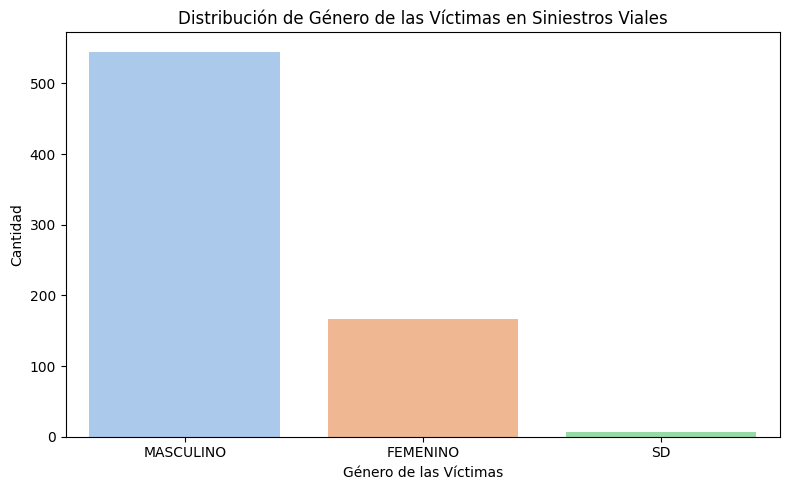

In [53]:
# Configuración del gráfico de barras
plt.figure(figsize=(8, 5))  # Tamaño de la figura
gender_counts = Df_siniestros['Sexo'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts, palette='pastel')  # Creación del gráfico de barras con colores suaves

# Etiquetas y título
plt.xlabel('Género de las Víctimas')
plt.ylabel('Cantidad')
plt.title('Distribución de Género de las Víctimas en Siniestros Viales')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()


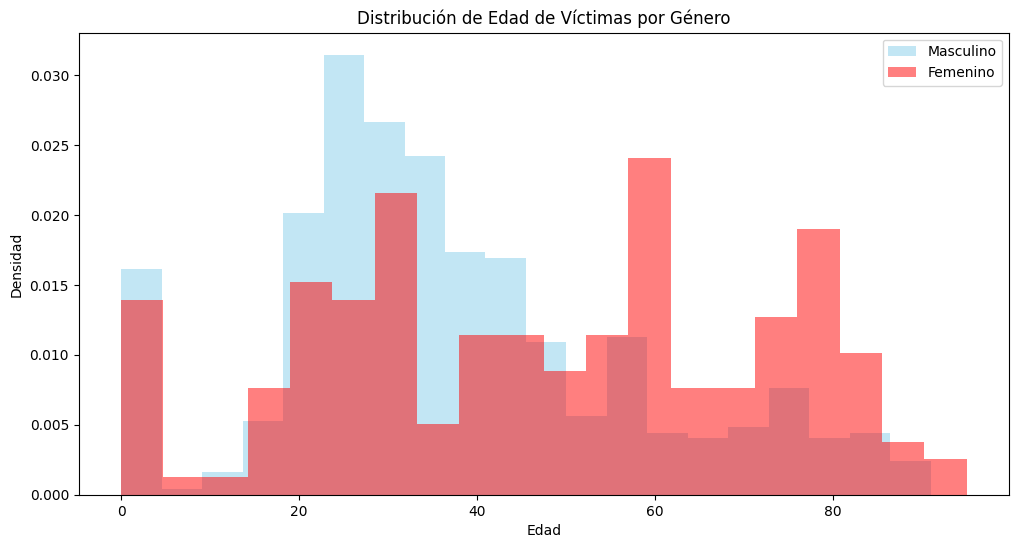

In [54]:
# Filtrar por sexo y eliminar valores nulos
masculino = Df_siniestros.loc[Df_siniestros['Sexo'] == 'MASCULINO', 'Edad'].dropna()
femenino = Df_siniestros.loc[Df_siniestros['Sexo'] == 'FEMENINO', 'Edad'].dropna()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Género')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Observamos un gráfico que representa dos histogramas superpuestos en un mismo eje. Esto se hace para facilitar la comparación visual entre las edades de las víctimas de ambos sexos.

Los resultados del gráfico revelan que las víctimas de sexo masculino tienden a tener edades comprendidas principalmente entre los 20 y los 40 años. Por otro lado, las víctimas de sexo femenino presentan una distribución más dispersa, con edades que se concentran en los grupos de 40, 60 y 80 años.

En resumen, el análisis de edades de las víctimas sugiere diferencias significativas entre los sexos, con los hombres siendo más jóvenes en promedio y las mujeres abarcando un rango de edades más amplio en los incidentes viales.

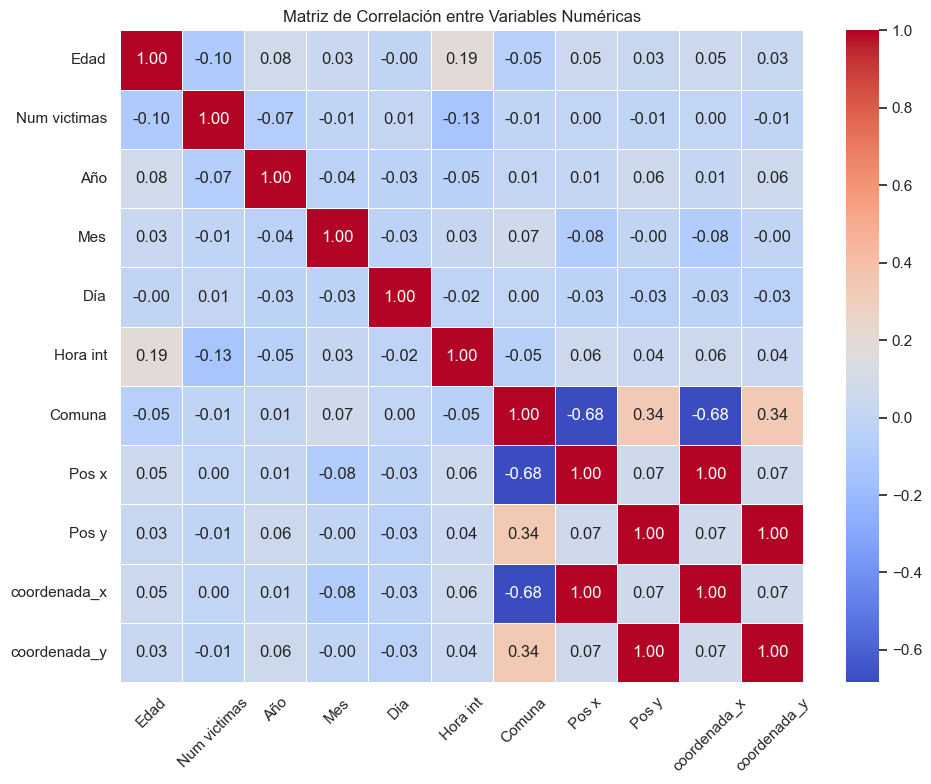

In [ ]:
# Selecciona solo las columnas numéricas
Df_siniestros_numericas = Df_siniestros.select_dtypes(include=['number'])

# Calcula la matriz de correlación
cor_matrix = Df_siniestros_numericas.corr()

# Resto del código para crear el gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



El análisis de la matriz de correlación revela relaciones notables entre las variables numéricas. Se observan fuertes correlaciones positivas entre las características 'Coordenada' y 'Pos', lo cual es coherente con las expectativas. Además, se identifica una correlación positiva de menor magnitud entre 'Edad' y 'Hora'. En contraste, la mayoría de las correlaciones son negativas, lo cual era previsible, ya que el número de víctimas en un accidente no está directamente relacionado con una fecha o hora específica.

Dado el enfoque principal de este proyecto, que se centra en analizar siniestros con el propósito de reducir las víctimas fatales, se decide iniciar la exploración detallada con la variable 'Num víctimas'.

C:\Users\ACER\AppData\Local\Temp\ipykernel_16912\4248597762.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_filtrado, x='Num victimas', bins=10, palette="Paired")


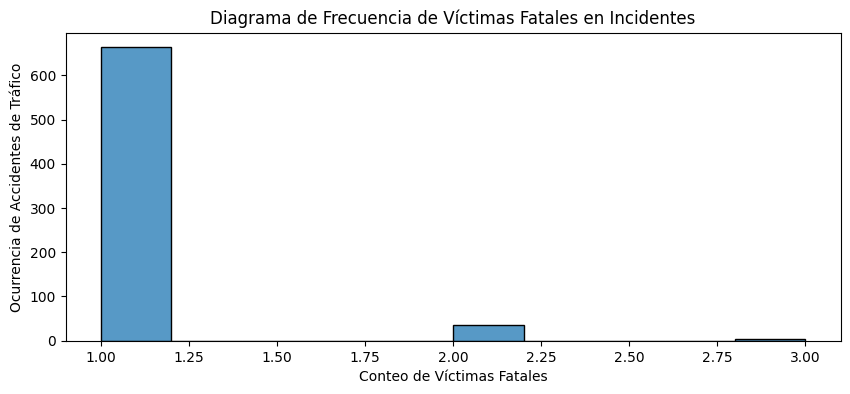

In [ ]:
# Se filtran los valores sin datos o nulos
df_filtrado = Df_siniestros[Df_siniestros["Num victimas"].notnull() & (Df_siniestros["Num victimas"] != 0)]

# Se crea el histograma de distribución
plt.figure(figsize=(10, 4))
sns.histplot(data=df_filtrado, x='Num victimas', bins=10, palette="Paired")

plt.ylabel("Ocurrencia de Accidentes de Tráfico")
plt.xlabel("Conteo de Víctimas Fatales")
plt.title("Diagrama de Frecuencia de Víctimas Fatales en Incidentes")

plt.show()


La mayoría de los siniestros viales reportan una sola víctima fatal, lo que representa el 75% de los casos. La ocurrencia de siniestros con tres víctimas fatales es poco común.

### **Análisis de la Distribución de Víctimas en Accidentes Viales por Edad y Año**

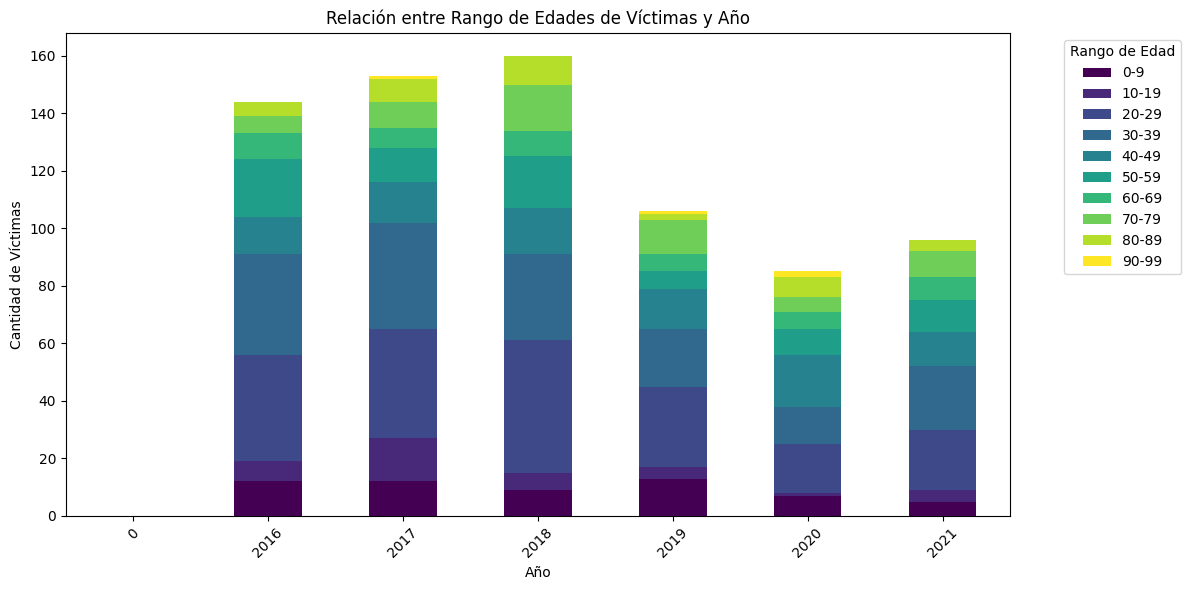

In [ ]:
# Crear rangos de edades en intervalos de 10 años
edad_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Etiquetas para los rangos de edades
edad_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Agregar una nueva columna 'Rango de Edad' al DataFrame original
Df_siniestros['Rango de Edad'] = pd.cut(Df_siniestros['Edad'], bins=edad_bins, labels=edad_labels, right=False)

# Agrupar los datos en cantidad de víctimas por rango de edad y año
data = Df_siniestros.groupby(['Rango de Edad', "Año"])['Num victimas'].sum().reset_index()

# Pivotear los datos para crear un DataFrame adecuado para un gráfico de barras apiladas
pivot_data = data.pivot(index='Año', columns='Rango de Edad', values='Num victimas').fillna(0)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())

plt.title('Relación entre Rango de Edades de Víctimas y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')

# Cambiar el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.legend(title='Rango de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


A partir del gráfico de barras apiladas generado, se pueden obtener las siguientes conclusiones:

1. **Tendencia General Descendente:** En general, se observa una tendencia descendente en la cantidad de víctimas a lo largo de los años. Esta disminución podría ser resultado de mejoras en la seguridad vial, regulaciones más estrictas, campañas de concienciación pública o avances tecnológicos en la seguridad de vehículos.

2. **Pico en Edades Intermedias:** Los años 2016 y 2017 presentan los puntos más altos en términos de cantidad de víctimas, con valores de alrededor de 145 y 155 respectivamente. Este pico se encuentra en el grupo de edad intermedio, lo que sugiere que las personas en la etapa media de sus vidas pueden estar en mayor riesgo de sufrir accidentes viales en esos años.

3. **Reducción Progresiva:** A partir de 2018, se observa una reducción progresiva en la cantidad de víctimas en todas las edades, alcanzando su punto más bajo en 2020 y luego mostrando un ligero aumento en 2021. Esta disminución podría atribuirse a medidas de seguridad más efectivas, mayor cumplimiento de normativas viales o cambios en el comportamiento de conducción.

4. **Importancia de la Seguridad Vial Continua:** Aunque se ha logrado una disminución en la cantidad de víctimas en siniestros viales en general, el aumento en 2021 destaca la importancia de mantener y fortalecer las iniciativas de seguridad vial en curso. Esto incluye la necesidad de adaptarse a las nuevas condiciones de tráfico y a los patrones de comportamiento de los conductores.

### **Distribución de los roles de las víctimas por Sexo**

<Figure size 1200x600 with 0 Axes>

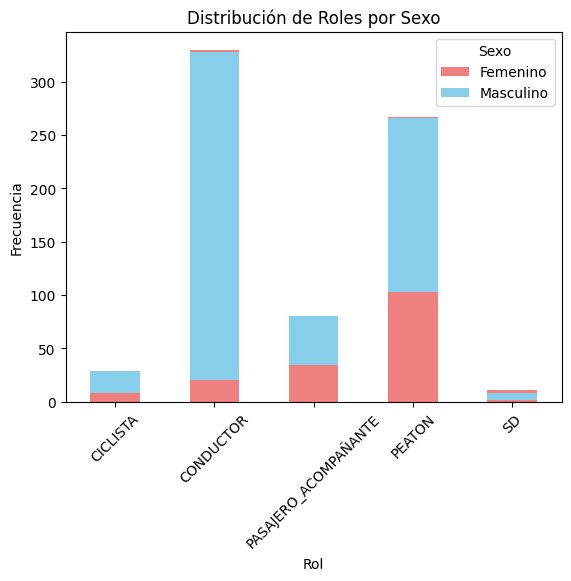

In [ ]:
# Crear una tabla de contingencia
contingencia = pd.crosstab(Df_siniestros['Rol'], Df_siniestros['Sexo'])

# Colores para las barras apiladas
colores = ["lightcoral", "skyblue"]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
ax = contingencia.plot(kind='bar', stacked=True, color=colores)

# Título y etiquetas de ejes
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

# Alinear etiquetas del eje x con rotación de 45 grados
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

En cuanto a la distribución de roles de las víctimas:

1. En general, la mayoría de las víctimas desempeñaban el rol de "Conductor", seguido de "Peatón".

2. Para las víctimas masculinas, el rol más común en los siniestros era el de "Conductor", seguido de "Peatón".

3. En el caso de las víctimas femeninas, el rol predominante en los siniestros era el de "Peatón", seguido de "Pasajero-Acompañante".

### **Distribucíon de víctimas según sexo y tipo de vehículo**

<Figure size 1200x600 with 0 Axes>

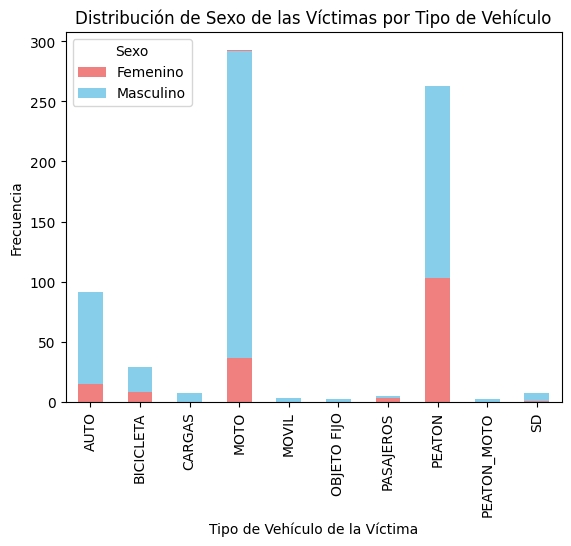

In [ ]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(Df_siniestros['Victima'], Df_siniestros['Sexo'])

# Colores para las barras apiladas
colores = ["lightcoral", "skyblue"]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
ax = tabla_contingencia.plot(kind='bar', stacked=True, color=colores)

# Título y etiquetas de ejes
plt.title('Distribución de Sexo de las Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo de la Víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


La preponderancia de accidentes mortales involucra motocicletas y exhibe una marcada inclinación hacia el género masculino. En segundo término, encontramos a los peatones, donde la predominancia de víctimas masculinas es menos pronunciada en comparación con el primer grupo.